**Modelo de IA**

In [ ]:
# Montar Google Drive en Google Colab
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Ruta del archivo en Google Drive
ruta_archivo = '/content/drive/MyDrive/Colab Notebooks/Reto OFFC/IA.parquet'

# Leer el archivo
df = pd.read_parquet(ruta_archivo)
display(df)

,store,assigned_at,answer
0,None,2023-02-21 07:18:07.598950,comentario
1,FN60,2023-02-20 12:25:30.652022,"Todo lo hacen perfecto,, gracias por su atención"
2,T002,2023-02-18 14:10:31.610430,Offcorss...siempre me ha parecido una buena al...
3,T013,2023-02-23 12:40:51.640983,Me encanta las tiendas el servicio y sus produ...
4,FN54,2023-02-20 17:10:31.230531,Ya no ay probadores
...,...,...,...
28974,T067,2023-02-18 17:40:32.373139,"Necesitabamos algo super puntual, una camiseta..."
28975,T074,2023-02-11 13:40:30.901471,Continúen con la calidad actual y diseños de l...
28976,T051,2023-02-20 18:10:31.484063,"Todo muy lindo, innovador 💯"
28977,FN76,2023-01-12 19:55:30.869511,Gracias


In [ ]:
# Descargar stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

# Función para procesar texto
def procesar_texto(texto):
    if texto is None:
        return ""
    texto = texto.lower()
    texto = ''.join([char for char in texto if char not in string.punctuation])
    texto = ' '.join([word for word in texto.split() if word not in stop_words])
    return texto

df['answer'] = df['answer'].apply(procesar_texto)


NameError: ignored

In [ ]:
# Función para procesar texto
def procesar_texto(texto):
    if texto is None:
        return ""
    texto = texto.lower()
    texto = ''.join([char for char in texto if char not in string.punctuation])
    texto = ' '.join([word for word in texto.split() if word not in stop_words])
    return texto

df['answer'] = df['answer'].apply(procesar_texto)

In [ ]:
!python -m textblob.download_corpora

df = df.dropna(subset=['answer'])
def analisis_sentimiento(texto):
    if texto is None:
        return 0  # o cualquier valor por defecto que desees
    blob = TextBlob(texto)
    return blob.sentiment.polarity


df['sentimiento'] = df['answer'].apply(analisis_sentimiento)



[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


<ipython-input-27-ed561fa1aa03>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentimiento'] = df['answer'].apply(analisis_sentimiento)


In [ ]:
# Vectorizar los comentarios y aplicar LDA

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Ahora puedes ejecutar el código para vectorizar los comentarios y aplicar LDA
stop_words_list = list(stop_words)

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=stop_words_list)
dtm = vectorizer.fit_transform(df['answer'])
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)



LatentDirichletAllocation(n_components=5, random_state=42)

In [ ]:
# Mostrar palabras clave por tema
for index, topic in enumerate(lda.components_):
    print(f'TEMA {index}')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')


TEMA 0
['comprar', 'hijo', 'hijos', 'gracias', 'promociones', 'offcorss', 'ropa', 'marca', 'siempre', 'encanta']


TEMA 1
['excelentes', 'exelente', 'atencion', 'buen', 'buena', 'productos', 'calidad', 'servicio', 'atención', 'excelente']


TEMA 2
['mala', 'atendió', 'si', 'personal', 'servicio', 'compra', 'cliente', 'tienda', 'bien', 'atención']


TEMA 3
['niño', 'tener', 'prendas', 'ropa', 'mas', 'talla', 'niños', 'tallas', 'variedad', 'tienda']


TEMA 4
['niños', 'marca', 'prendas', 'gusta', 'diseños', 'gracias', 'atención', 'calidad', 'ropa', 'buena']




In [ ]:
def procesar_texto(texto):
    if texto is None:
        return ""
    texto = texto.lower()
    texto = ''.join([char for char in texto if char not in string.punctuation])
    texto = ' '.join([word for word in texto.split() if word not in stop_words and len(word) > 3])
    return texto


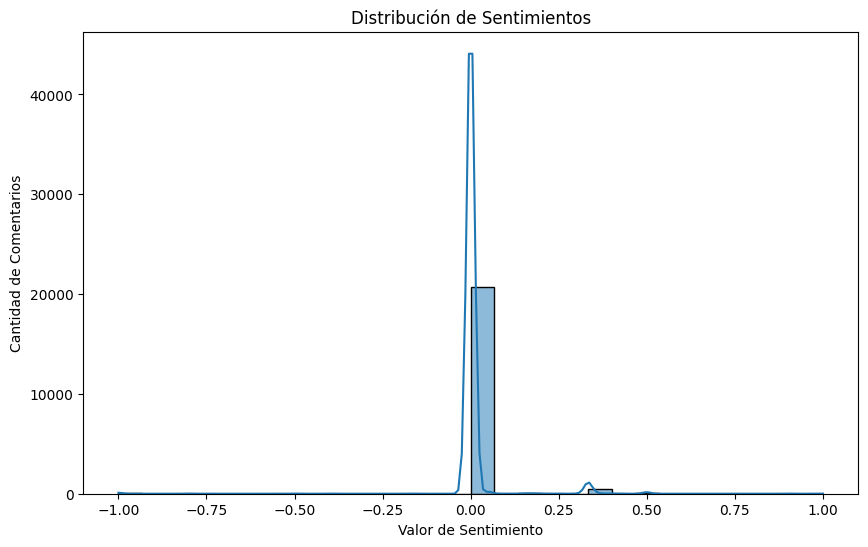

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['sentimiento'], bins=30, kde=True)
plt.title('Distribución de Sentimientos')
plt.xlabel('Valor de Sentimiento')
plt.ylabel('Cantidad de Comentarios')
plt.show()


In [ ]:
for index, topic in enumerate(lda.components_):
    top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    print(f'TEMA {index}: {" | ".join(top_words)}')


TEMA 0: comprar | hijo | hijos | gracias | promociones | offcorss | ropa | marca | siempre | encanta
TEMA 1: excelentes | exelente | atencion | buen | buena | productos | calidad | servicio | atención | excelente
TEMA 2: mala | atendió | si | personal | servicio | compra | cliente | tienda | bien | atención
TEMA 3: niño | tener | prendas | ropa | mas | talla | niños | tallas | variedad | tienda
TEMA 4: niños | marca | prendas | gusta | diseños | gracias | atención | calidad | ropa | buena


In [ ]:
problemas_comunes = df[df['sentimiento'] < -0.5]['answer']
print("Comentarios con Problemas Comunes:")
print(problemas_comunes.head(10))  # Mostramos los primeros 10 comentarios con problemas comunes


Comentarios con Problemas Comunes:
55      En diciembre realice una compra de un jean y d...
1080    quiero dejar una inconformidad de mi compra en...
1088    Estuve en la tienda de Unicentro Armenia y que...
1104    Compre en febrero una muda de ropa camisa el e...
1310    Las prendas son maravillosas , pero el servici...
1650    Es muy triste ver tanta nesecidad de trabajo y...
1988    En la tienda los vendedores no ayudan , se la ...
2632    Terrible atención en la tienda Molinos, no hab...
4504    Vivimos en Cajíca y el offcorss de fontanar, e...
4672    No soy Nancy Arango . Quisiera se corrigiera e...
Name: answer, dtype: object


In [ ]:
elogios = df[df['sentimiento'] > 0.5]['answer']
print("Comentarios con Características Elogiadas:")
print(elogios.head(10))  # Mostramos los primeros 10 comentarios con elogios


Comentarios con Características Elogiadas:
87                                        Very, very good
295                  Super todo!!! Es excelente en todo 😊
642                                             Happy day
760                                            Excellent 
1112    Felicidades sigan ofreciendo su mejor servicio...
2952    Muy buena atención, variedad, siempre encuentr...
3410                                              Is nice
4463                                             Super!!!
6672    Super todoooo!!!!\nNecesitamos una tienda cerc...
9121             Muy buena ropa ideal para nuestros hijos
Name: answer, dtype: object


In [ ]:
areas_mejora = df[(df['sentimiento'] > -0.5) & (df['sentimiento'] < 0.5)]['answer']
print("Comentarios sobre Áreas de Mejora:")
print(areas_mejora.head(10))  # Mostramos los primeros 10 comentarios sobre áreas de mejora


Comentarios sobre Áreas de Mejora:
0                                           comentario
1    Todo lo hacen perfecto,, gracias por su atención 
2    Offcorss...siempre me ha parecido una buena al...
3    Me encanta las tiendas el servicio y sus produ...
4                                  Ya no ay probadores
5                                  Excelente servicio 
6                             Me atendieron muy bien\n
7                                       Buen servicio 
8    ME ENCANTO LA TIENDA Y LA CALIDAD DE LA ROPA M...
9    La tienda me gusta, cuando quiero algo para mi...
Name: answer, dtype: object


In [ ]:
!pip install wordcloud

from wordcloud import WordCloud


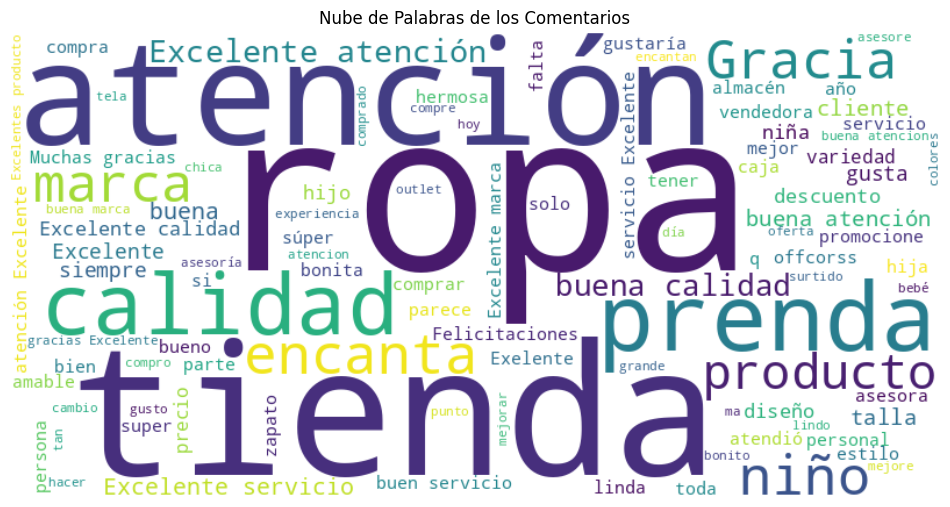

In [ ]:
# Concatenar todos los comentarios procesados en una sola cadena de texto
texto_total = ' '.join(df['answer'])

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words, max_words=100, colormap='viridis').generate(texto_total)

# Visualizar la nube de palabras
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de los Comentarios')
plt.show()
